In [1]:
import pandas as pd
import numpy as np
import ast
import collections as c
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline

In [2]:
convs=pd.read_csv('../data/bbAllFullConvosAWRandSortExtraDay.csv',sep=';')

/home/mako0970/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (65,66,67,69,70,71,73,74,75,77,78,79,81,82,83,85,86,87,89,90,91,93,94,95,97,98,99,101,102,103,105,106,107,109,110,111,113,114,115,117,118,119,121,122,123,125,126,127,129,130,131,133,134,135,137,138,139,141,142,143,145,146,147,149,150,151,153,154,155,157,158,159,161,162,163,165,166,167,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
ontopic=pd.read_csv('../data/SecondCodingCSV3.csv', sep=',', header=None)

In [4]:
ontopic.head()

,0,1
0,0,0
1,1,0
2,2,1
3,3,0
4,4,1


In [5]:
convs['ontopicConvo']=ontopic[1]

In [6]:
len(convs[convs.ontopicConvo==1])

1895

In [7]:
len(convs[convs.ontopicConvo==0])

3461

In [9]:
codedNum=Out[8]+Out[7]

In [10]:
len(convs[convs.ontopicConvo==1])/float(codedNum)

0.3538088125466766

* So overall, **35%** of conversations are ontopic according to my coding

### Correct for Time Zone - add/subtract the conversations according to shifting the buckets 4/5 hours

In [6]:
convsTZ=pd.read_csv('../data/bbAllFullConvosMoreAWCorrectTimeZone.csv',sep=';')

/home/mako0970/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (38,39,42,43,46,47,50,51,54,55,58,59,62,63,66,67,70,71,74,75,78,79,82,83,86,87,90,91,94,95,98,99,102,103,106,107,110,111,114,115,118,119,122,123,126,127,130,131,134,135,138,139,142,143,146,147,150,151,154,155,158,159,162,163,166,167,170,171,183,188,189) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
len(convs)

5357

In [8]:
len(convsTZ)

5350

In [9]:
convs.tweetSet=convs.tweetSet.apply(lambda x: ast.literal_eval(x))

In [10]:
def ReplyTweetSet(row):
    chain=set()
    for i in range(44):
        colName='tweet'+str(i)
        if str(row[colName])!='0':
            chain=chain | set([row[colName]])
    return tuple(sorted(list(chain)))

In [11]:
convsTZ['tweetSet']=convsTZ.apply(ReplyTweetSet, axis=1)

In [14]:
convsTZ.tweetSet.head()

0    (260471876864864256, 260472148982898690, 26047...
1    (261510871686201345, 261511065333026819, 26151...
2             (260941078516084736, 260941898158571523)
3             (270363494401048581, 270364973367177216)
4    (263381270141231105, 263382291533930496, 26339...
Name: tweetSet, dtype: object

In [15]:
convs.tweetSet.head()

0             (270566698342559744, 270566805980975104)
1             (265820307548434432, 266174259779497984)
2             (261512597482901506, 261512924860928001)
3    (262725903526801408, 262726106493382656, 26272...
4    (264445560503820288, 264455988684410881, 26446...
Name: tweetSet, dtype: object

In [12]:
temp=convsTZ.merge(convs[['text0','ontopicConvo','tweetSet']], how='left',left_on='tweetSet',right_on='tweetSet')

In [13]:
len(temp)

5350

In [14]:
temp.text0_x=temp.text0_y

In [15]:
temp=temp.rename(index=str, columns={"text0_x": "text0"})

In [16]:
del temp['text0_y']

In [17]:
len(temp[temp.ontopicConvo.isnull()])

15

In [18]:
temp.ontopicConvo[temp.ontopicConvo.isnull()]=0

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
convs=temp

In [41]:
convs.to_csv('../data/bbAllFullConvosCodedAWCorrectTimeZone.csv',sep=';')

In [24]:
len(convs[convs.ontopicConvo==1])

1895

In [25]:
len(convs[convs.ontopicConvo==0])

3455

In [26]:
codedNum=Out[24]+Out[25]

In [27]:
len(convs[convs.ontopicConvo==1])/float(codedNum)

0.3542056074766355

In [38]:
convs.allNames=convs.allNames.apply(lambda x: ast.literal_eval(x))

# Break down ontopic by Time

In [39]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [40]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [41]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [42]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-24 00:00:00'))]

In [51]:
len(set(lafter.tweetSet.sum()))

2399

In [24]:
numConvs=len(before)+len(after)+len(during)+len(lafter)

In [120]:
len(before)/float(numConvs)

0.15584169664836206

In [121]:
len(during)/float(numConvs)

0.39954554061730735

In [122]:
len(after)/float(numConvs)

0.2685097519409203

In [123]:
len(lafter)/float(numConvs)

0.17610301079341034

**So for the ALL conversations:**
* 15% happen Before
* 40% happen During
* 27% happen After
* and 18% happen Long After

In [124]:
len(before[before.ontopicConvo==1])/float(len(convs[convs.ontopicConvo==1]))

0.0036939313984168864

In [125]:
len(during[during.ontopicConvo==1])/float(len(convs[convs.ontopicConvo==1]))

0.7224274406332454

In [126]:
len(after[after.ontopicConvo==1])/float(len(convs[convs.ontopicConvo==1]))

0.21055408970976253

In [127]:
len(lafter[lafter.ontopicConvo==1])/float(len(convs[convs.ontopicConvo==1]))

0.04802110817941953

##### **Ontopic Conversations:**
* Are non-existant in Before (people didn't know yet)
* Are over-represented in During - 72% of ontopic conversations fall into During, whereas only 39% of all coded conversations happen in During
* Are slighlty under-represented in After and especially Long After (21% and 5% compared to 27% and 18% for all coded)

In [128]:
len(before[before.ontopicConvo==1])/float(len(before))

0.00850546780072904

In [129]:
len(during[during.ontopicConvo==1])/float(len(during))

0.6488151658767772

In [130]:
len(after[after.ontopicConvo==1])/float(len(after))

0.28138222849083216

In [131]:
len(lafter[lafter.ontopicConvo==1])/float(len(lafter))

0.0978494623655914

**Takeway:**
* Ontopic conversations comprise 65% of all the During conversations

#### Chi-square

In [44]:
b_on=len(before[before.ontopicConvo==1])

7

In [45]:
d_on=len(during[during.ontopicConvo==1])

1369

In [46]:
a_on=len(after[after.ontopicConvo==1])

399

In [47]:
la_on=len(lafter[lafter.ontopicConvo==1])

91

In [48]:
b_off=len(before[before.ontopicConvo==0])

816

In [49]:
d_off=len(during[during.ontopicConvo==0])

741

In [50]:
a_off=len(after[after.ontopicConvo==0])

1019

In [51]:
la_off=len(lafter[lafter.ontopicConvo==0])

839

In [33]:
N=len(before)+len(during)+len(after)+len(lafter)

In [35]:
exp_b_on=len(before)*len(convs[convs.ontopicConvo==1])/N

In [36]:
exp_d_on=len(during)*len(convs[convs.ontopicConvo==1])/N

In [37]:
exp_a_on=len(after)*len(convs[convs.ontopicConvo==1])/N

In [38]:
exp_la_on=len(lafter)*len(convs[convs.ontopicConvo==1])/N

In [39]:
exp_b_off=len(before)*len(convs[convs.ontopicConvo==0])/N

In [40]:
exp_d_off=len(during)*len(convs[convs.ontopicConvo==0])/N

In [41]:
exp_a_off=len(after)*len(convs[convs.ontopicConvo==0])/N

In [42]:
exp_la_off=len(lafter)*len(convs[convs.ontopicConvo==0])/N

In [43]:
st.chisquare([b_on, d_on, a_on, la_on, b_off,d_off,a_off,la_off],f_exp=[exp_b_on,exp_d_on,exp_a_on,exp_la_on,exp_b_off,exp_d_off,exp_a_off,exp_la_off])

(1511.6265446086304, 0.0)

## Conversation size, length, and tempo for ontopic vs offtopic conversations

In [132]:
np.median(convs.convSize[convs.ontopicConvo==1])

2.0

In [133]:
np.median(convs.convSize[convs.ontopicConvo==0])

2.0

In [134]:
np.percentile(convs.convSize[convs.ontopicConvo==1], 90)

4.0

**THIS CHANGED!!!!!**

In [135]:
np.percentile(convs.convSize[convs.ontopicConvo==0], 90)

4.0

In [136]:
np.median(convs.convoLen[convs.ontopicConvo==1])

858.0

In [137]:
np.median(convs.convoLen[convs.ontopicConvo==0])

671.0

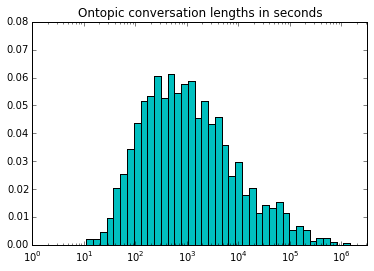

In [138]:
convoLen = convs.convoLen[convs.ontopicConvo==1].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Ontopic conversation lengths in seconds')

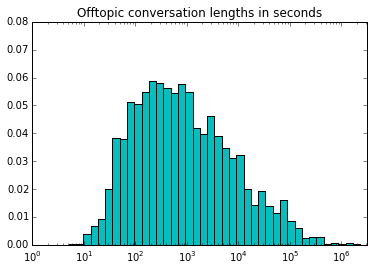

In [139]:
convoLen = convs.convoLen[convs.ontopicConvo==0].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Offtopic conversation lengths in seconds')

In [141]:
np.median(convs.medianReplyTime[convs.ontopicConvo==1].dropna())

498.75

In [142]:
np.median(convs.medianReplyTime[convs.ontopicConvo==0])

402.0

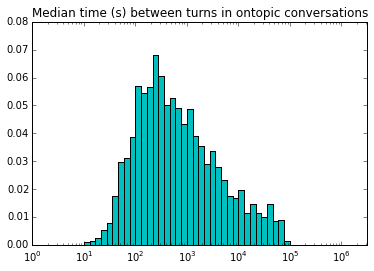

In [143]:
medRepTime=convs.medianReplyTime[convs.ontopicConvo==1].dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in ontopic conversations')

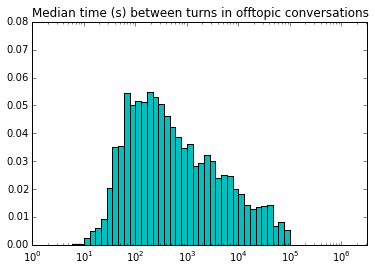

In [144]:
medRepTime=convs.medianReplyTime[convs.ontopicConvo==0].dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in offtopic conversations')

In [145]:
st.ranksums(convs.convoLen[convs.ontopicConvo==0], convs.convoLen[convs.ontopicConvo==1])

(-4.3163146747695444, 1.5865576439900775e-05)

In [146]:
st.ranksums(convs.medianReplyTime[convs.ontopicConvo==0], convs.medianReplyTime[convs.ontopicConvo==1])

(-3.82977464100329, 0.00012826066523247235)

## Ontopic conversations and user configurations

In [52]:
ontopic=convs[convs.ontopicConvo==1]

In [53]:
offtopic=convs[convs.ontopicConvo==0]

#### Check distribution for user configurations for the ONTOPIC conversations

In [149]:
len(ontopic[ontopic.userSetLen==1])/float(len(ontopic))

0.1467018469656992

In [150]:
len(ontopic[ontopic.userSetLen==2])/float(len(ontopic))

0.8211081794195251

In [151]:
len(ontopic[ontopic.userSetLen>2])/float(len(ontopic))

0.03218997361477573

** Ontopic conversations:**
* Are under-represnted among the monologs (15% instead of 25% in overall/coded)
* Are over-represented among the dialogs (82% instead of 73% in overall/coded)
* And very slightly overrpresented among the group discussions(3% vs 2% in overall/coded)

In [152]:
len(offtopic[offtopic.userSetLen==1])/float(len(offtopic))

0.3065123010130246

In [153]:
len(offtopic[offtopic.userSetLen==2])/float(len(offtopic))

0.6850940665701881

In [154]:
len(offtopic[offtopic.userSetLen>2])/float(len(offtopic))

0.008393632416787264

** Off-topic conversations:**
* Are over-represnted among the monologs (31% instead of 25% in overall/coded)
* Are under-represented among the dialogs (68% instead of 73% in overall/coded)
* And very slightly under-rpresented among the group discussions (1% vs 2% in overall/coded)

In [155]:
len(ontopic[ontopic.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.20792819745699326

In [156]:
len(ontopic[ontopic.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.39663522814172825

In [157]:
len(ontopic[ontopic.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.6777777777777778

In [158]:
len(offtopic[offtopic.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.7920718025430067

In [159]:
len(offtopic[offtopic.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.6033647718582718

In [160]:
len(offtopic[offtopic.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.32222222222222224

** On-topic conversations:**
* Make up 21% of monologs
* Make up 40% of dialogs
* And makeup 69% of group chats

** Off-topic conversations:**
* Make up 79% of monologs
* Make up 60% of dialogs
* And makeup 32% of group chats


* So monologs tend to be off-topic (self-correction in most cases)
* Dialogs are still more often off-topic (60%) than on (40%), but dialogs are much more often on-topic than monologs
* And most group conversations are on-topic

In [54]:
on_mono=len(ontopic[ontopic.userSetLen==1])

278

In [55]:
on_dia=len(ontopic[ontopic.userSetLen==2])

1556

In [56]:
on_group=len(ontopic[ontopic.userSetLen>2])

61

In [57]:
off_mono=len(offtopic[offtopic.userSetLen==1])

1059

In [58]:
off_dia=len(offtopic[offtopic.userSetLen==2])

2367

In [59]:
off_group=len(offtopic[offtopic.userSetLen>2])

29

## Ontopic/offtopic conversations and high-follower users

In [161]:
len(ontopic[ontopic.allHighFollowUsers==0])/float(len(convs[convs.allHighFollowUsers==0]))

0.2594568380213385

In [162]:
len(ontopic[ontopic.allHighFollowUsers>0])/float(len(convs[convs.allHighFollowUsers>0]))

0.41362530413625304

In [163]:
len(offtopic[offtopic.allHighFollowUsers==0])/float(len(convs[convs.allHighFollowUsers==0]))

0.7405431619786615

In [164]:
len(offtopic[offtopic.allHighFollowUsers>0])/float(len(convs[convs.allHighFollowUsers>0]))

0.5863746958637469

** Conversations with NO Popular Users:**
* Are 26% on-topic
* And 74% off-topic

** Conversations with Popular Users:**
* Are 41% on-topic
* And 59% off-topic


* So conversations with Popular Users are more likely to be on-topic
* These are often news and government accounts that provide official information
* So conversations with them are more likely to be ontopic
* JUST represent ontopic % in the TEXT

### Ontopic and high-followers over time

In [165]:
len(before[(before.ontopicConvo==1) & (before.allHighFollowUsers>0)])/float(len(before.allHighFollowUsers>0))

0.004860267314702308

In [166]:
len(during[(during.ontopicConvo==1) & (during.allHighFollowUsers>0)])/float(len(during.allHighFollowUsers>0))

0.46208530805687204

In [167]:
len(after[(after.ontopicConvo==1) & (after.allHighFollowUsers>0)])/float(len(after.allHighFollowUsers>0))

0.2066290550070522

In [168]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.allHighFollowUsers>0)])/float(len(lafter.allHighFollowUsers>0))

0.07419354838709677

**Over Time Periods:**
* Conversations with Popular Users are most often on-topic in the During period (46% of During conversations with Popular Users)
* Less frequently after (21% of After conversations with Popular Users)
* And only 7% for Long After conversations with Popular Users
* Again, this points to the fact the Popular users with whom the geo-vulnerable engage during are carriers of relevant information
* Represent as BAR CHART - this and below?

In [169]:
len(before[(before.ontopicConvo==1) & (before.allHighFollowUsers==0)])/float(len(before.allHighFollowUsers==0))

0.0036452004860267314

In [170]:
len(during[(during.ontopicConvo==1) & (during.allHighFollowUsers==0)])/float(len(during.allHighFollowUsers==0))

0.18672985781990523

In [171]:
len(after[(after.ontopicConvo==1) & (after.allHighFollowUsers==0)])/float(len(after.allHighFollowUsers==0))

0.07475317348377997

In [172]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.allHighFollowUsers==0)])/float(len(lafter.allHighFollowUsers==0))

0.023655913978494623

* Conversations with NO Popular users are also most often on-topic During, but with only 18% of these conversations being on-topic in that time period

## Ontopic/offtopic conversations and freq conversationalists

In [173]:
len(ontopic[ontopic.strongTiesAllUsers<2])/float(len(convs[convs.strongTiesAllUsers<2]))

0.37386215864759426

In [174]:
len(ontopic[ontopic.strongTiesAllUsers>1])/float(len(convs[convs.strongTiesAllUsers>1]))

0.3276165347405453

In [175]:
len(offtopic[offtopic.strongTiesAllUsers<2])/float(len(convs[convs.strongTiesAllUsers<2]))

0.6261378413524057

In [176]:
len(offtopic[offtopic.strongTiesAllUsers>1])/float(len(convs[convs.strongTiesAllUsers>1]))

0.6723834652594547

**Conversations with less-than-two "freq conv" users:**
* Are 37% on-topic
* 63% on-topic

**Conversation with two-or-more "freq conv" users:**
* Are 33% on-topic
* 67% off-topic


* Not a strong difference (CHECK if stat sig)
* But it seems that conversation with less-than-two thick reply tie users are a bit more often on topic

In [60]:
len(ontopic[ontopic.strongTiesAllUsers<2])

1150

In [61]:
len(ontopic[ontopic.strongTiesAllUsers>1])

745

In [62]:
len(offtopic[offtopic.strongTiesAllUsers<2])

1926

In [63]:
len(offtopic[offtopic.strongTiesAllUsers>1])

1529

### Check with some vs none (as opposed to 0-1 vs >1)

In [177]:
len(ontopic[ontopic.strongTiesAllUsers==0])/float(len(convs[convs.strongTiesAllUsers==0]))

0.4151436031331593

In [178]:
len(ontopic[ontopic.strongTiesAllUsers>0])/float(len(convs[convs.strongTiesAllUsers>0]))

0.3297537977998952

**This makes the difference STRONGER:**
* 42% of conversations with no thick-reply-tie users are on-topic
* And 33% of conversations with thick-reply-tie users are on-topic

In [179]:
len(ontopic[ontopic.strongTiesAllUsers<2])/float(len(ontopic))

0.6068601583113457

In [180]:
len(ontopic[ontopic.strongTiesAllUsers>1])/float(len(ontopic))

0.39313984168865435

### Excluding high follower-count users

In [181]:
len(ontopic[(ontopic.strongTiesAllUsers<2) & (ontopic.allHighFollowUsers==0)])/float(len(convs[(convs.strongTiesAllUsers<2) & (convs.allHighFollowUsers==0)]))

0.26241660489251295

In [182]:
len(ontopic[(ontopic.strongTiesAllUsers>1)&(ontopic.allHighFollowUsers==0)])/float(len(convs[(convs.strongTiesAllUsers>1)&(convs.allHighFollowUsers==0)]))

0.2538569424964937

### Ontopic and frequent conversationalists over time

#### Many freq conv tie users

In [191]:
len(before[(before.ontopicConvo==1) & (before.strongTiesAllUsers>1)])/float(len(before.strongTiesAllUsers>1))

0.004860267314702308

In [192]:
len(during[(during.ontopicConvo==1) & (during.strongTiesAllUsers>1)])/float(len(during.strongTiesAllUsers>1))

0.24454976303317535

In [193]:
len(after[(after.ontopicConvo==1) & (after.strongTiesAllUsers>1)])/float(len(after.strongTiesAllUsers>1))

0.11988716502115655

In [194]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.strongTiesAllUsers>1)])/float(len(lafter.strongTiesAllUsers>1))

0.04838709677419355

#### Few freq conv users

In [195]:
len(before[(before.ontopicConvo==1) & (before.strongTiesAllUsers<2)])/float(len(before.strongTiesAllUsers<2))

0.0036452004860267314

In [196]:
len(during[(during.ontopicConvo==1) & (during.strongTiesAllUsers<2)])/float(len(during.strongTiesAllUsers<2))

0.4042654028436019

In [197]:
len(after[(after.ontopicConvo==1) & (after.strongTiesAllUsers<2)])/float(len(after.strongTiesAllUsers<2))

0.1614950634696756

In [198]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.strongTiesAllUsers<2)])/float(len(lafter.strongTiesAllUsers<2))

0.04946236559139785

#### For Chi-square

In [64]:
len(during[(during.ontopicConvo==1)&(during.strongTiesAllUsers<2)])

853

In [65]:
len(during[(during.ontopicConvo==0)&(during.strongTiesAllUsers<2)])

414

In [66]:
len(during[(during.ontopicConvo==1)&(during.strongTiesAllUsers>1)])

516

In [67]:
len(during[(during.ontopicConvo==0)&(during.strongTiesAllUsers>1)])

327

### Check with some vs none (as opposed to 0-1 vs >1)

#### Any freq conv users

In [199]:
len(before[(before.ontopicConvo==1) & (before.strongTiesAllUsers>0)])/float(len(before.strongTiesAllUsers>0))

0.007290400972053463

In [200]:
len(during[(during.ontopicConvo==1) & (during.strongTiesAllUsers>0)])/float(len(during.strongTiesAllUsers>0))

0.41137440758293836

In [201]:
len(after[(after.ontopicConvo==1) & (after.strongTiesAllUsers>0)])/float(len(after.strongTiesAllUsers>0))

0.2073342736248237

In [202]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.strongTiesAllUsers>0)])/float(len(lafter.strongTiesAllUsers>0))

0.07419354838709677

#### No freq conv users

In [203]:
len(before[(before.ontopicConvo==1) & (before.strongTiesAllUsers==0)])/float(len(before.strongTiesAllUsers==0))

0.001215066828675577

In [204]:
len(during[(during.ontopicConvo==1) & (during.strongTiesAllUsers==0)])/float(len(during.strongTiesAllUsers==0))

0.23744075829383887

In [205]:
len(after[(after.ontopicConvo==1) & (after.strongTiesAllUsers==0)])/float(len(after.strongTiesAllUsers==0))

0.07404795486600846

In [206]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.strongTiesAllUsers==0)])/float(len(lafter.strongTiesAllUsers==0))

0.023655913978494623

**I'm SO confused!!!:**
* I think it's the conversations with freq conv user that decide everything
* And depending on how you fold them in you get different results
* I think we need to investigate THREE CATEGORY here

### With THREE Category

In [207]:
len(ontopic[ontopic.strongTiesAllUsers==0])/float(len(convs[convs.strongTiesAllUsers==0]))

0.4151436031331593

In [208]:
len(ontopic[ontopic.strongTiesAllUsers==1])/float(len(convs[convs.strongTiesAllUsers==1]))

0.3329015544041451

In [209]:
len(ontopic[ontopic.strongTiesAllUsers>1])/float(len(convs[convs.strongTiesAllUsers>1]))

0.3276165347405453

In [210]:
len(ontopic[ontopic.strongTiesAllUsers==0])/float(len(ontopic))

0.33562005277044854

In [211]:
len(ontopic[ontopic.strongTiesAllUsers==1])/float(len(ontopic))

0.2712401055408971

In [212]:
len(ontopic[ontopic.strongTiesAllUsers>1])/float(len(ontopic))

0.39313984168865435

#### No freq conv users

In [213]:
len(before[(before.ontopicConvo==1) & (before.strongTiesAllUsers==0)])/float(len(before.strongTiesAllUsers==0))

0.001215066828675577

In [214]:
len(during[(during.ontopicConvo==1) & (during.strongTiesAllUsers==0)])/float(len(during.strongTiesAllUsers==0))

0.23744075829383887

In [215]:
len(after[(after.ontopicConvo==1) & (after.strongTiesAllUsers==0)])/float(len(after.strongTiesAllUsers==0))

0.07404795486600846

In [216]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.strongTiesAllUsers==0)])/float(len(lafter.strongTiesAllUsers==0))

0.023655913978494623

#### One freq conversationalist

In [217]:
len(before[(before.ontopicConvo==1) & (before.strongTiesAllUsers==1)])/float(len(before.strongTiesAllUsers==1))

0.002430133657351154

In [218]:
len(during[(during.ontopicConvo==1) & (during.strongTiesAllUsers==1)])/float(len(during.strongTiesAllUsers==1))

0.16682464454976303

In [219]:
len(after[(after.ontopicConvo==1) & (after.strongTiesAllUsers==1)])/float(len(after.strongTiesAllUsers==1))

0.08744710860366714

In [220]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.strongTiesAllUsers==1)])/float(len(lafter.strongTiesAllUsers==1))

0.025806451612903226

#### Many freq conv users

In [221]:
len(before[(before.ontopicConvo==1) & (before.strongTiesAllUsers>1)])/float(len(before.strongTiesAllUsers>1))

0.004860267314702308

In [222]:
len(during[(during.ontopicConvo==1) & (during.strongTiesAllUsers>1)])/float(len(during.strongTiesAllUsers>1))

0.24454976303317535

In [223]:
len(after[(after.ontopicConvo==1) & (after.strongTiesAllUsers>1)])/float(len(after.strongTiesAllUsers>1))

0.11988716502115655

In [224]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.strongTiesAllUsers>1)])/float(len(lafter.strongTiesAllUsers>1))

0.04838709677419355

## Check if new pairs come up during

In [33]:
convs.allNames=convs.allNames.apply(lambda x: ast.literal_eval(x))

In [34]:
convs.allNames=convs.allNames.apply(lambda x: str(sorted(x)))

In [35]:
len(before.allNames)

823

In [36]:
len(set(before.allNames))

603

* So coded Before has 823 conversations with 603 unique sets of user

In [37]:
len(during.allNames)

2110

In [38]:
len(set(during.allNames))

1516

* So coded Before has 2110 conversations with 1516 unique sets of user

In [231]:
len(after.allNames)

1418

In [232]:
len(set(after.allNames))

961

In [40]:
len(set(before.allNames)& set(during.allNames))/float(len(set(before.allNames)))

0.3416252072968491

In [234]:
len(set(before.allNames)& set(after.allNames))/float(len(set(before.allNames)))

0.23714759535655058

In [235]:
len(set(before.allNames)& set(lafter.allNames))/float(len(set(before.allNames)))

0.208955223880597

In [236]:
len(set(during.allNames) & set(after.allNames))/float(len(set(during.allNames)))

0.19656992084432717

In [237]:
len(set(during.allNames) & set(lafter.allNames))/float(len(set(during.allNames)))

0.1358839050131926

In [238]:
len(set(after.allNames) & set(lafter.allNames))/float(len(set(after.allNames)))

0.21227887617065558

In [239]:
newFronBtoD=set(during.allNames)-set(before.allNames)

In [240]:
newDFforBtoD=during[during.allNames.isin(newFronBtoD)]

In [241]:
tieStrength=newDFforBtoD.strongTiesAllUsers.groupby(newDFforBtoD.allNames).first()

In [242]:
len(tieStrength[tieStrength<2])/float(len(tieStrength))

0.7526717557251908

So **75%** of new pairings that emerge from Before to During are with **less than two frequent conversationalists**

In [243]:
newDFforBtoD.head().values

array([[261510871686201345, '2012-10-25 12:53:45', 'rjgoldsborough', ...,
        1,
        (261510871686201345, 261511065333026819, 261511305444356097, 261514050192670722, 261676431480872960, 261677375350263808, 262658949185150976),
        1.0],
       [262244577438740480, '2012-10-27 13:29:14', 'davidhorvitz', ..., 0,
        (262244577438740480, 262251799594008577), 0.0],
       [263712548598190081, '2012-10-31 14:42:25', 'SGottiR', ..., 0,
        (263712548598190081, 263713016892248065, 263713107917025280), 1.0],
       [263033538545319937, '2012-10-29 17:44:17', 'kessler', ..., 1,
        (263033538545319937, 263033997746126848), 0.0],
       [262596466143535105, '2012-10-28 12:47:30', 'DeonTheFireGuy', ...,
        0, (262596466143535105, 262596604895313923, 262597083071148033),
        1.0]], dtype=object)

## Look at conversations with Many frequent conversationalists

In [244]:
manyStrongTie=convs[convs.strongTiesAllUsers>1]

In [245]:
len(manyStrongTie)

2274

In [246]:
sample=manyStrongTie.head(228)

In [247]:
sample.loc[:,'newInd']=xrange(228)

/home/mako0970/.local/lib/python2.7/site-packages/pandas/core/indexing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/mako0970/.local/lib/python2.7/site-packages/pandas/core/indexing.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [248]:
sample[sample.newInd==41].values

array([[266628329531121664, '2012-11-08 14:48:42', 'lupopelupope',
        '@LanaStraps @arimwhite @rchieB taras bar downtown? BIRTHDAI WEEKEND HAY',
        266628903739719680, '2012-11-08 14:50:59', 'rchieB',
        "@lupopelupope @LanaStraps @arimwhite I'm djing tonight and tomorrow night. #djrichieisabitch she always ruins the bday fun timez. TEQUILA?",
        266628461228072961, '2012-11-08 14:49:13', 'arimwhite',
        '@lupopelupope I dig it', 0, '1970-01-01 00:00:00', '0', '0', 0,
        '1970-01-01 00:00:00', '0', '0', 0, '1970-01-01 00:00:00', '0',
        '0', 0, '1970-01-01 00:00:00', '0', '0', 0, '1970-01-01 00:00:00',
        '0', '0', 0, '1970-01-01 00:00:00', '0', '0', 0,
        '1970-01-01 00:00:00', '0', '0', 0, '1970-01-01 00:00:00', '0',
        '0', 0, '1970-01-01 00:00:00', '0', '0', 0, '1970-01-01 00:00:00',
        '0', '0', 0, '1970-01-01 00:00:00', '0', '0', 0,
        '1970-01-01 00:00:00', '0', '0', 0, '1970-01-01 00:00:00', '0',
        '0', 0, '1970-

In [249]:
fewStrongTie=convs[convs.strongTiesAllUsers<=1]

In [250]:
len(fewStrongTie)

3076

In [251]:
sample=fewStrongTie.head(307)

In [252]:
sample.loc[:,'newInd']=xrange(307)

In [249]:
sample[sample.newInd==37].values

array([[258968704287637504, '2012-10-18 16:32:05', 'kkoopers',
        '@blockedbyleann  hear that @leannrimes @marcelpariseau? Seriously Marcel, UR the worst PR rep.',
        258968922290806784, '2012-10-18 16:32:57', 'kkoopers',
        "@kkoopers @blockedbyleann @leannrimes @MarcelPariseau Isn't ur job to advise ur client so they look good to the public, not to be a yes man?",
        0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0',
        '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0',
        '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0,
        '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0',
        '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0',
        '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0,
        '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0',
        '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0',
        '0', '0', 0, '

## Links New to During

In [253]:
len(newDFforBtoD)

1673

In [254]:
sample=newDFforBtoD.head(164)

In [255]:
sample.loc[:,'newInd']=xrange(164)

In [256]:
sample[sample.newInd==148].values

array([[262944034715205632, '2012-10-29 11:48:37', 'NYCMayorsOffice',
        "Mayor: City government is open for business today. We're here to serve New Yorkers when they need help. #Sandy",
        262951049957089280, '2012-10-29 12:16:30', 'porcinea',
        ". @NYCMayorsOffice what are you doing for inmates on Riker's island, which is in zone A, but has not been evacuated?",
        0, '1970-01-01 00:00:00', '0', '0', 0, '1970-01-01 00:00:00', '0',
        '0', 0, '1970-01-01 00:00:00', '0', '0', 0, '1970-01-01 00:00:00',
        '0', '0', 0, '1970-01-01 00:00:00', '0', '0', 0,
        '1970-01-01 00:00:00', '0', '0', 0, '1970-01-01 00:00:00', '0',
        '0', 0, '1970-01-01 00:00:00', '0', '0', 0, '1970-01-01 00:00:00',
        '0', '0', 0, '1970-01-01 00:00:00', '0', '0', 0,
        '1970-01-01 00:00:00', '0', '0', 0, '1970-01-01 00:00:00', '0',
        '0', 0, '1970-01-01 00:00:00', '0', '0', 0, '1970-01-01 00:00:00',
        '0', '0', 0, '1970-01-01 00:00:00', '0', '0', 0,
  